<a href="https://colab.research.google.com/github/aman5898/Data-Science-December/blob/main/22-01-13-LinearRegression/Project_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

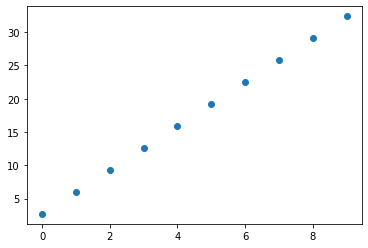

In [2]:
x = np.arange(10)
y = 3.3*x + 2.7

plt.scatter(x, y)

In [3]:
X = x.reshape(-1, 1)
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [4]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(X, y)
y_pred = lin.predict(X)

In [5]:
for a, b in zip(x, y):
  print(a, b)

0 2.7
1 6.0
2 9.3
3 12.599999999999998
4 15.899999999999999
5 19.2
6 22.499999999999996
7 25.799999999999997
8 29.099999999999998
9 32.4


In [6]:
for a, b in zip(x, y_pred):
  print(a, b)

0 2.700000000000001
1 6.000000000000001
2 9.3
3 12.6
4 15.9
5 19.200000000000003
6 22.5
7 25.799999999999997
8 29.1
9 32.4


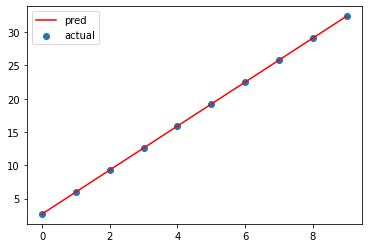

In [7]:
plt.scatter(x, y, label = 'actual', )
plt.plot(x, y_pred, label = 'pred', color = 'red')

plt.legend()

In [8]:
lin.coef_, lin.intercept_

(array([3.3]), 2.700000000000001)

# 2D

In [9]:
x1 = np.arange(10)
# x2 = np.random.rand(10) * 10
x2 = np.linspace(-5, 3, 10)

y = 3*x1 + 5*x2 + 8

In [10]:
import plotly.express as px

px.scatter_3d(x = x1, y = x2, z = y)

In [11]:
X = np.hstack([x1.reshape(-1, 1), x2.reshape(-1, 1)])

In [12]:
lin.fit(X, y)
y_pred = lin.predict(X)

In [13]:
lin.coef_, lin.intercept_

(array([4.15862069, 3.69655172]), 1.482758620689653)

In [14]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter3d(x = x1, y = x2, z = y, name = 'actual'))

fig.add_trace(go.Scatter3d(x = x1, y = x2, z = y_pred, name = 'predict'))

fig.show()

# Implement From Scratch

In [24]:
class LinearRegressionScratch():

    def __init__(self, learning_rate, iterations):
      self.learning_rate = learning_rate
      self.iterations = iterations
    
    def fit(self, X, Y):

      row, col = X.shape

      self.W = np.random.rand(col)
      self.b = np.random.randint(0, 10)

      for i in range(self.iterations):
        y_pred = self.predict(X)

        dW= -2 * ( (X.T).dot((Y - y_pred)) ) / row
        db = -2 * (Y - y_pred).sum() / row

        self.W = self.W - self.learning_rate*dW
        self.b = self.b - self.learning_rate*db

        x = X.reshape(-1)
        if i < 10 or (i % 100 == 0) :
            plt.scatter(x, Y)
            plt.plot(x, y_pred)
            plt.title(str(i))
            plt.show()
      

    def predict(self, X):
      return X.dot(self.W) + self.b

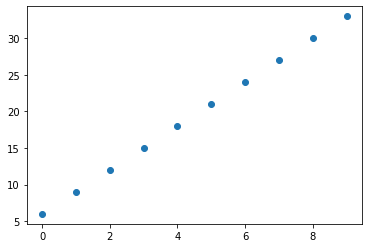

In [26]:
X = x1.reshape(-1, 1)
y = 3*x1 + 6

plt.scatter(x1, y)

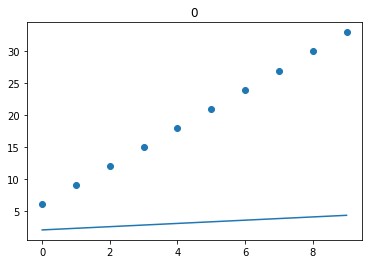

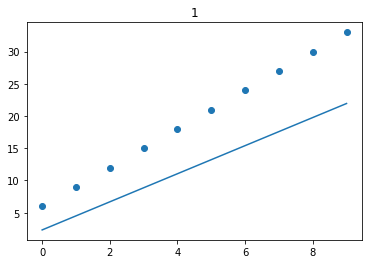

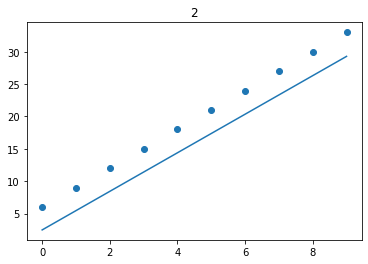

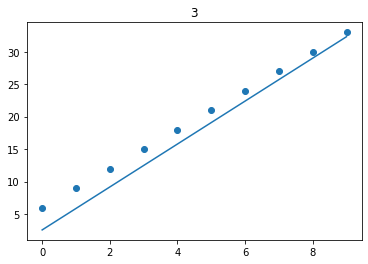

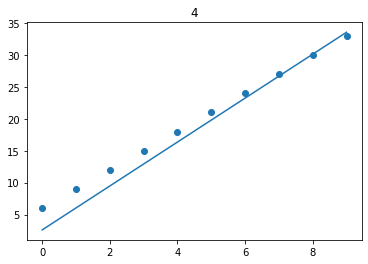

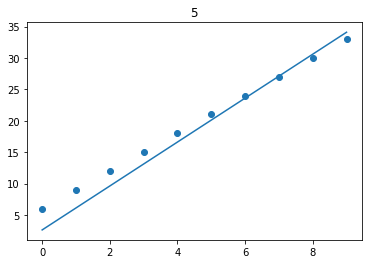

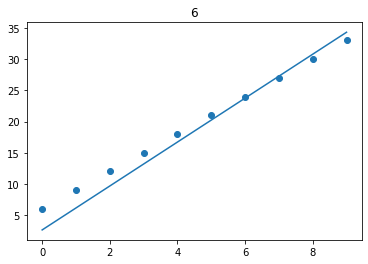

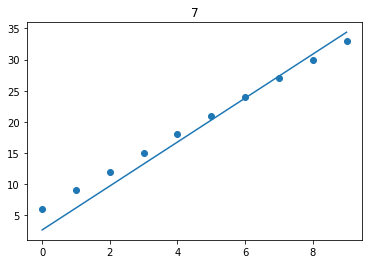

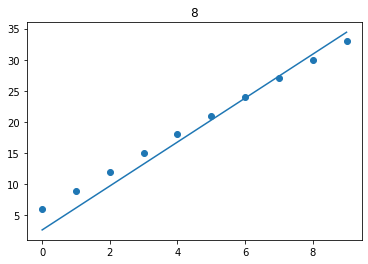

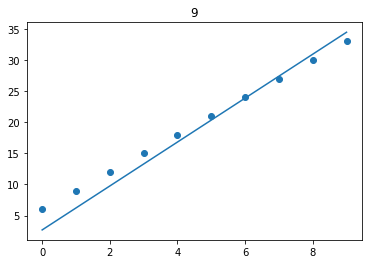

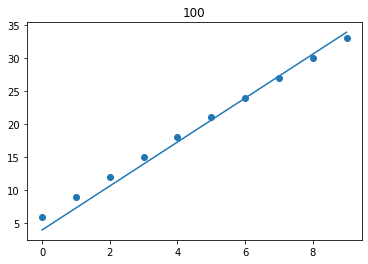

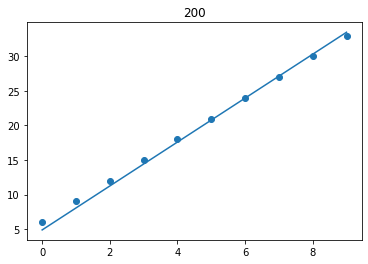

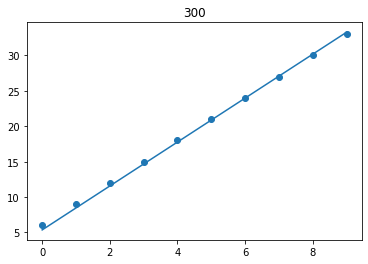

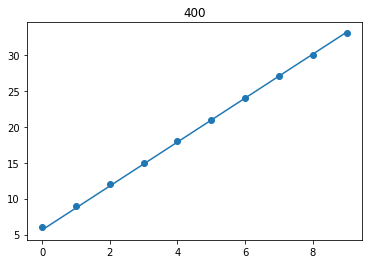

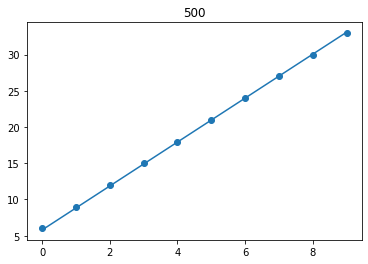

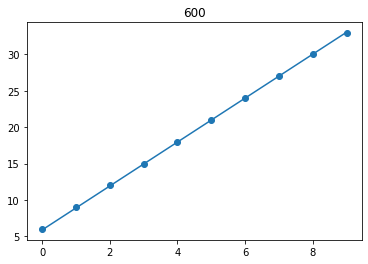

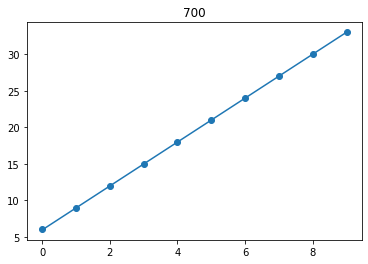

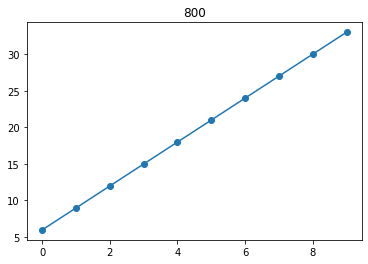

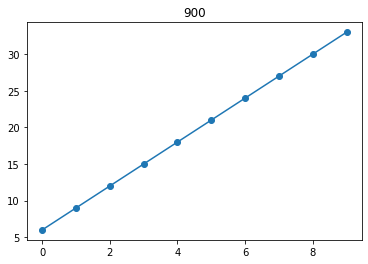

In [28]:
linScratch = LinearRegressionScratch(0.01, 1000)

linScratch.fit(X, y)

In [29]:
linScratch.predict(X)

array([ 5.98794198,  8.98986493, 11.99178788, 14.99371083, 17.99563378,
       20.99755673, 23.99947968, 27.00140263, 30.00332558, 33.00524853])

# Gradient Descent

[Implementation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

# Polynimial

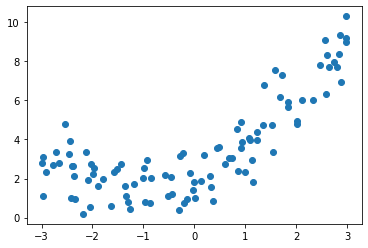

In [118]:
m = 100

x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1)

plt.scatter(x, y)

In [131]:
X = x.reshape(-1 ,1)

In [132]:
from sklearn.preprocessing import PolynomialFeatures

pol = PolynomialFeatures(degree = 25)
X = pol.fit_transform(X)

In [133]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(X, y)

LinearRegression()

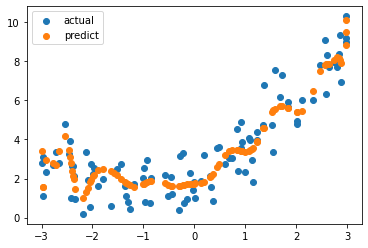

In [134]:
plt.scatter(x, y, label = 'actual')
plt.scatter(x, lin.predict(X), label = 'predict')
plt.legend()

In [137]:
lin.coef_

array([[ 2.36123191e+02,  9.79677896e-02, -1.00495940e-01,
         9.02589083e+00,  1.70349964e+01, -2.72484655e+01,
        -4.67858416e+01,  3.89694988e+01,  5.67057450e+01,
        -3.24751500e+01, -3.87240424e+01,  1.74787534e+01,
         1.65350628e+01, -6.38554282e+00, -4.63445019e+00,
         1.61276493e+00,  8.66574424e-01, -2.80808075e-01,
        -1.07037357e-01,  3.29695787e-02,  8.37876159e-03,
        -2.48493074e-03, -3.76236885e-04,  1.08301607e-04,
         7.37664060e-06, -2.07133287e-06]])

# Regularization

In [ ]:
from sklearn.linear_model import Ridge

for i in range(1, 2000, 500):
    rig = Ridge(alpha=i)

    rig.fit(X, y)

    plt.scatter(x, y, label = 'actual')
    plt.scatter(x, rig.predict(X), label = 'predict')
    plt.legend()
    plt.title(i)
    plt.show()

In [138]:
rig.coef_

array([[ 0.00000000e+00,  8.58771212e-01,  6.93642673e-01,
         1.01570365e-01,  1.27087830e-01, -1.70632509e-01,
        -1.16924614e-01, -8.82592316e-02, -1.42896493e-01,
         1.72591456e-01,  4.98236248e-03,  1.72843888e-01,
         1.95989232e-01, -2.66204649e-01, -1.49426779e-01,
         1.31235895e-01,  5.04621618e-02, -3.38864042e-02,
        -9.30593377e-03,  5.09789080e-03,  9.73259574e-04,
        -4.50479943e-04, -5.43526045e-05,  2.17229270e-05,
         1.26205035e-06, -4.41797051e-07]])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.733e+01, tolerance: 5.932e-02



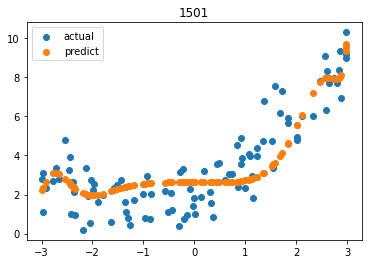

In [145]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(X, y)

plt.scatter(x, y, label = 'actual')
plt.scatter(x, lasso.predict(X), label = 'predict')
plt.legend()
plt.title(i)
plt.show()

In [146]:
lasso.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  9.32872799e-02,  2.07821982e-02, -6.66655435e-03,
       -1.83138131e-04, -8.64628671e-04, -1.56508131e-04,  1.33351092e-06,
       -8.52376639e-06,  2.32654653e-06, -5.37245157e-07,  2.64817398e-07,
       -2.62451424e-08,  2.23322736e-08,  4.47833217e-10,  1.56830513e-09,
        3.86337854e-10,  8.34966145e-11,  7.51431884e-11,  1.12406964e-12,
        1.13071593e-11, -5.67873792e-13])

# Project

In [151]:
from sklearn.datasets import load_boston
import pandas as pd

In [154]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

In [156]:
df.sample(4)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
319,0.47547,0.0,9.90,0,0.544,6.113,58.8,4.0019,4,304,18.4,396.23,12.73,21.0
59,0.10328,25.0,5.13,0,0.453,5.927,47.2,6.9320,8,284,19.7,396.90,9.22,19.6
189,0.08370,45.0,3.44,0,0.437,7.185,38.9,4.5667,5,398,15.2,396.90,5.39,34.9
439,9.39063,0.0,18.10,0,0.740,5.627,93.9,1.8172,24,666,20.2,396.90,22.88,12.8


CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 
25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract 
bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 
1940

DIS: Weighted distances to five Boston employment 
centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of 
[people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s




In [158]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [161]:
df.corr()['medv'].sort_values(ascending = False)

medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

In [235]:
df3 = df.drop(['zn', 'b', 'dis', 'chas'], axis = 1)

In [252]:
df2 = df[['lstat', 'ptratio', 'rm', 'medv']]

In [253]:
df2

,lstat,ptratio,rm,medv
0,4.98,15.3,6.575,24.0
1,9.14,17.8,6.421,21.6
2,4.03,17.8,7.185,34.7
3,2.94,18.7,6.998,33.4
4,5.33,18.7,7.147,36.2
...,...,...,...,...
501,9.67,21.0,6.593,22.4
502,9.08,21.0,6.120,20.6
503,5.64,21.0,6.976,23.9
504,6.48,21.0,6.794,22.0


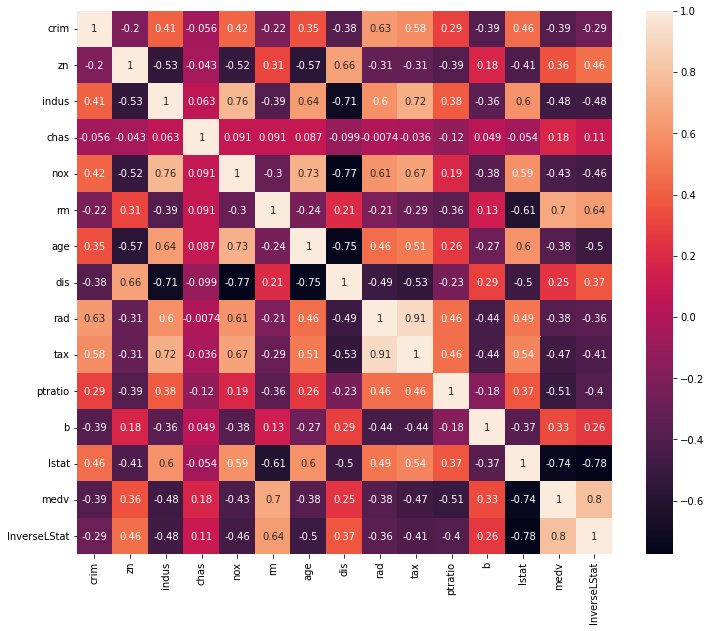

In [188]:
plt.figure(figsize = (12, 10))

sns.heatmap(df.corr(), annot = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



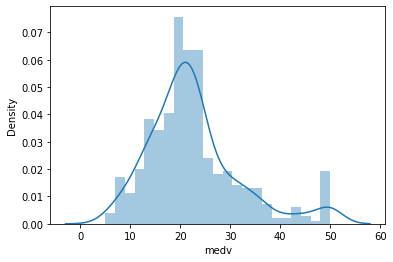

In [163]:
import seaborn as sns

sns.distplot(df['medv'])

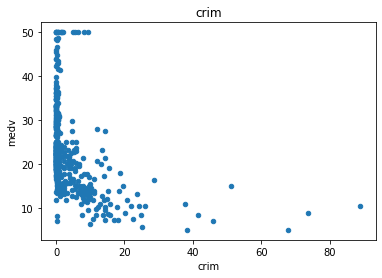

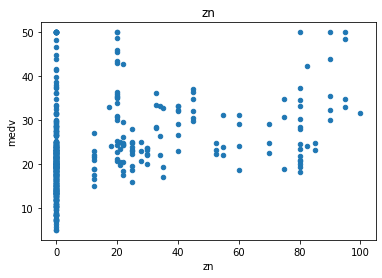

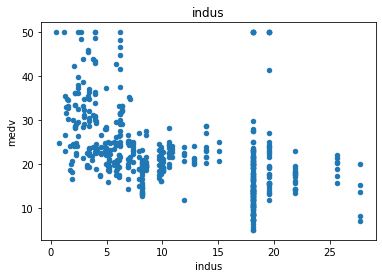

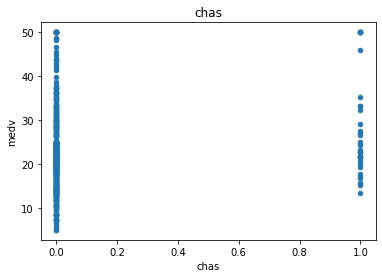

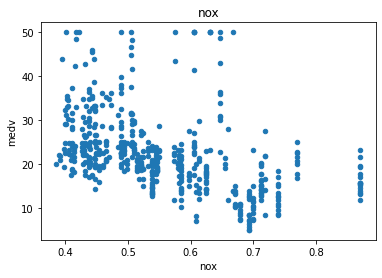

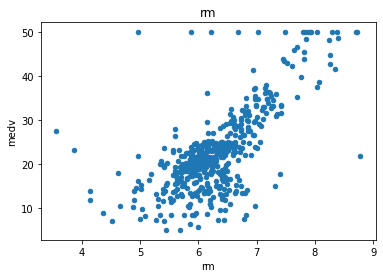

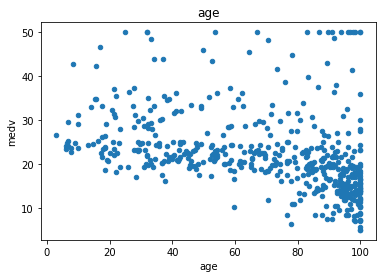

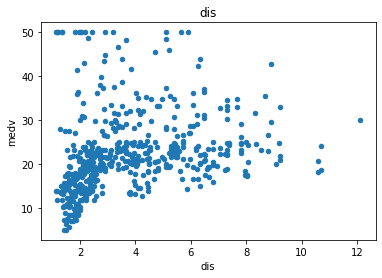

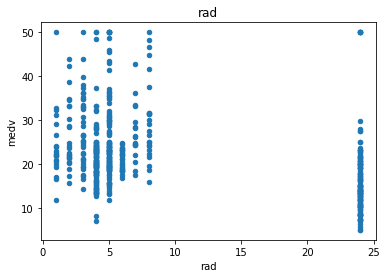

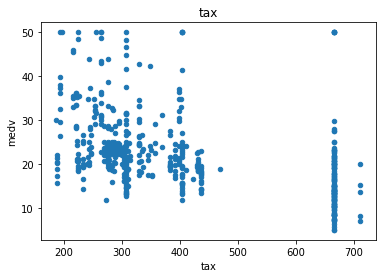

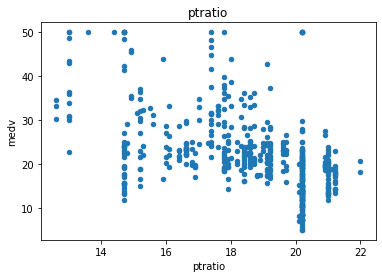

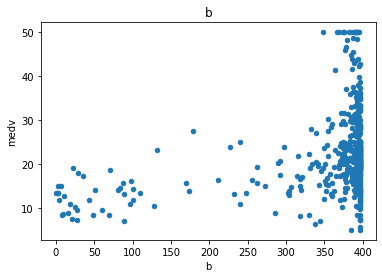

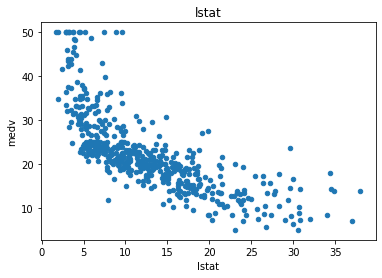

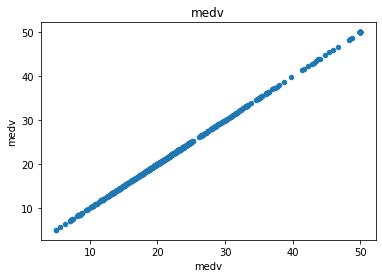

In [165]:
for col in df.columns:
  df.plot(kind = 'scatter', x = col, y = 'medv')
  plt.title(col)
  plt.show()

In [ ]:
sns.pairplot(df)

In [261]:
df2['InverseLStat'] = 10/df2['lstat']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [225]:
X = df.drop(['medv', 'InverseLStat'], axis = 1)
y = df['medv']

In [262]:
X = df2.drop(['medv'], axis = 1)
y = df2['medv']

In [263]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler, StandardScaler

X = StandardScaler().fit_transform(X)
lin = LinearRegression()
lin.fit(X, y)

LinearRegression()

In [264]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y)

In [215]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lin, X, y, cv = 3, scoring = 'neg_mean_squared_error')

In [216]:
-scores['test_score']

array([12.47955256, 39.05291932, 73.09323297])

In [217]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

rid = Ridge()
lasso = Lasso()

rid.fit(X, y)
lasso.fit(X,y)

Lasso()

In [218]:
-cross_validate(rid, X, y, cv = 3, scoring = 'neg_mean_squared_error')['test_score']

array([12.41937064, 38.99854859, 72.63691944])

In [219]:
-cross_validate(lasso, X, y, cv = 3, scoring = 'neg_mean_squared_error')['test_score']

array([10.20620855, 54.82291769, 76.11623297])

In [265]:
lin.fit(xtrain, ytrain)
rid.fit(xtrain, ytrain)
lasso.fit(xtrain, ytrain)

Lasso()

In [266]:
from sklearn.metrics import mean_squared_error

mean_squared_error(ytest, lin.predict(xtest))

20.0762638879011

In [267]:
mean_squared_error(ytest, rid.predict(xtest))

20.063158370187296

In [268]:
mean_squared_error(ytest, lasso.predict(xtest))

20.052114812144605